In [2]:
import json
import requests

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
get_all_info_about_genes = requests.get("https://open-genes.com/api/gene/")
all_info_about_genes = json.loads(get_all_info_about_genes.text)

In [4]:
open_genes_df = pd.DataFrame().from_dict(all_info_about_genes)
open_genes_df.reset_index(drop=True)
open_genes_df

,id,origin,familyOrigin,homologueTaxon,symbol,aliases,diseases,diseaseCategories,name,ncbiId,commentCause,uniprot,functionalClusters,expressionChange,timestamp,ensembl,methylationCorrelation,agingMechanisms,source
0,114,None,"{'id': 24, 'phylum': '', 'age': '', 'order': 25}",Euteleostomi,FAS,"[ALPS1A, APO-1, APT1, CD95, FAS1, FASTM, TNFRSF6]","{'160': {'icdCode': 'D47.9', 'icdName': 'Новоо...","{'685': {'icdCode': 'D37-D48', 'icdCategoryNam...",Fas cell surface death receptor,355,{'9': 'Возрастные изменения экспрессии гена/ак...,TNR6_HUMAN,"[{'id': 10, 'name': 'иммунная функция'}, {'id'...",2,"{'changed': '1638463685', 'created': None}",ENSG00000026103,,"[{'id': 22, 'name': 'нарушения межклеточного в...",[GeneAge]
1,252,None,"{'id': 24, 'phylum': '', 'age': '', 'order': 25}",Euteleostomi,HIC1,"[ZBTB29, ZNF901, hic-1]",[],[],hypermethylated in cancer 1,3090,{'10': 'Ген регулирует связанные со старением ...,HIC1_HUMAN,"[{'id': 27, 'name': 'сигналинг'}, {'id': 3, 'n...",0,"{'changed': '1638372646', 'created': None}",ENSG00000177374,,"[{'id': 19, 'name': 'накопление сенесцентных к...",[GeneAge]
2,325,None,"{'id': 24, 'phylum': '', 'age': '', 'order': 25}",,MT-RNR1,[MTRNR1],"{'194': {'icdCode': 'H90.3', 'icdName': 'Нейро...","{'795': {'icdCode': 'H90-H95', 'icdCategoryNam...",mitochondrially encoded 12S RNA,4549,{'10': 'Ген регулирует связанные со старением ...,MOTSC_HUMAN,"[{'id': 11, 'name': 'митохондриальная функция'...",1,"{'changed': '1627995612', 'created': '16081933...",ENSG00000211459,,[],[]
3,358,None,"{'id': 24, 'phylum': '', 'age': '', 'order': 25}",,CAPG,"[AFCP, HEL-S-66, MCP]",[],[],"capping actin protein, gelsolin like",822,{'13': 'Модуляция активности гена защищает от ...,CAPG_HUMAN,"[{'id': 12, 'name': 'организация цитоскелета'}...",1,"{'changed': '1638373043', 'created': '16235242...",ENSG00000042493,,"[{'id': 23, 'name': 'изменения структуры межкл...",[ABDB]
4,381,None,"{'id': 24, 'phylum': '', 'age': '', 'order': 25}",,ZFYVE9,"[MADHIP, NSP, PPP1R173, SARA, SMADIP]",[],[],zinc finger FYVE-type containing 9,9372,{'11': 'Возрастные изменения экспрессии гена/а...,ZFYV9_HUMAN,"[{'id': 14, 'name': 'транспорт'}, {'id': 27, '...",1,"{'changed': '1638373062', 'created': '16240147...",ENSG00000157077,,[],[ABDB]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,1422,None,None,,NHLRC1,"[EPM2A, EPM2B, MALIN, bA204B7.2]","{'902': {'icdCode': 'G40.3', 'icdName': 'Генер...","{'784': {'icdCode': 'G40-G47', 'icdCategoryNam...",NHL repeat containing E3 ubiquitin protein lig...,378884,{'9': 'Возрастные изменения экспрессии гена/ак...,NHLC1_HUMAN,"[{'id': 13, 'name': 'протеостаз'}, {'id': 32, ...",0,"{'changed': '1638373774', 'created': None}",ENSG00000187566,positive,"[{'id': 12, 'name': 'деградация протеолитическ...",[]
473,1444,None,None,,BIK,"[BIP1, BP4, NBK]",[],[],BCL2 interacting killer,638,{'9': 'Возрастные изменения экспрессии гена/ак...,BIK_HUMAN,"[{'id': 11, 'name': 'митохондриальная функция'...",2,"{'changed': '1638373775', 'created': None}",ENSG00000100290,positive,"[{'id': 17, 'name': 'нарушение целостности и б...",[]
474,1542,None,None,,ACOX1,"[ACOX, MITCH, PALMCOX, SCOX]","{'858': {'icdCode': 'E71.3', 'icdName': 'Наруш...","{'757': {'icdCode': 'E70-E90', 'icdCategoryNam...",acyl-CoA oxidase 1,51,{'11': 'Возрастные изменения экспрессии гена/а...,ACOX1_HUMAN,"[{'id': 22, 'name': 'метаболизм жиров'}, {'id'...",3,"{'changed': '1638373776', 'created': None}",ENSG00000161533,negative,"[{'id': 18, 'name': 'накопление активных форм ...",[Horvath]
475,1582,None,None,,FES,[FPS],[],[],"FES proto-oncogene, tyrosine kinase",2242,{'8': 'Возрастные изменения экспрессии гена/ак...,FES_HUMAN,"[{'id': 10, 'name': 'иммунная функция'}, {'id'...",1,"{'changed': '1638373777', 'created': None}",ENSG00000182511,negative,"[{'id': 22, 'name': 'нарушения межклеточного в...",[]


# Описательная статистика

## Гены по возраст-зависимым процессам

### Какие возраст-зависимые процессы чаще всего фигурируют в базе (косвенное свидетельство о том, насколько он важен относительно тех,которые не встречаются/встречаются редко)

In [5]:
genes_mechanisms = list()
for gene_info in all_info_about_genes:
    for am in gene_info['agingMechanisms']:
        genes_mechanisms.append({
            'symbol': gene_info['symbol'],
            'mechanism_name': am['name']
        })
    

In [6]:
genes_mechanisms_df = pd.DataFrame(genes_mechanisms)

In [7]:
genes_mechanisms_df['mechanism_name'].value_counts()

нарушение целостности и биогенеза митохондрий    152
нестабильность митохондриальной ДНК              118
накопление сенесцентных клеток                   115
нарушения иммунной системы                       106
транскрипционные изменения                       100
изменения структуры межклеточного матрикса        81
нарушения межклеточного взаимодействия            68
деградация протеолитических систем                66
ремоделирование хроматина                         60
нестабильность ядерной ДНК                        58
накопление активных форм кислорода                43
изменения метилирования ДНК                       36
стерильное воспаление                             31
дисрегуляция молекулярного пути INS/IGF-1         24
укорочение теломер                                21
повреждение матричной РНК                         20
истощение пула стволовых клеток                   19
изменения модификаций гистонов                    18
дисрегуляция молекулярного пути TOR           

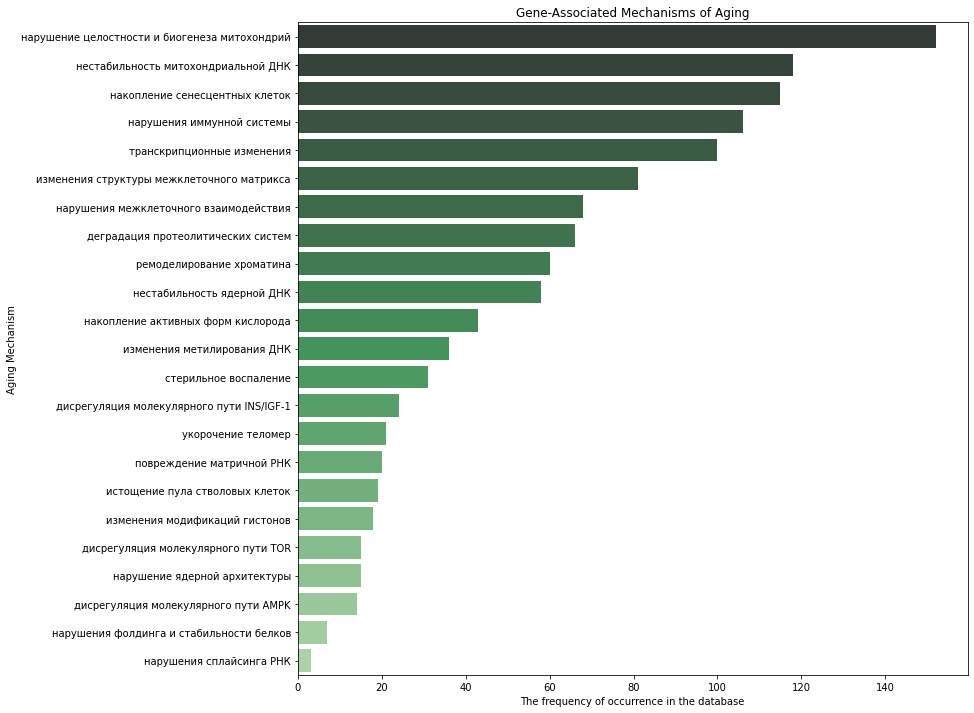

In [8]:
data = genes_mechanisms_df['mechanism_name'].value_counts()
plt.figure(figsize=(12,12))
pal = sns.color_palette("Greens_d", len(data))
rank = data.argsort().argsort()

plt.title("Gene-Associated Mechanisms of Aging")
plt.xlabel("The frequency of occurrence in the database")
plt.ylabel("Aging Mechanism")

ax = sns.barplot(
    x=data.values[:50], 
    y=data.index[:50], 
    data=genes_mechanisms_df,
    palette=np.array(pal[::1])[rank]
)

### Какие гены задействованы в более чем одном процессе (могут бытьнаиболее интересными мишенями для чекпойнт-ингибиторов, которыепоказали геропротекторные свойства)?

In [9]:
candidates = pd.DataFrame(genes_mechanisms_df['symbol'].value_counts())

In [10]:
candidates_filtered = candidates.loc[candidates['symbol'] > 1]

In [11]:
candidates_filtered

,symbol
CTNNB1,10
ATM,9
EZH2,9
APEX1,9
SIRT2,9
...,...
MMP14,2
RET,2
SERPINE1,2
FOLR1,2


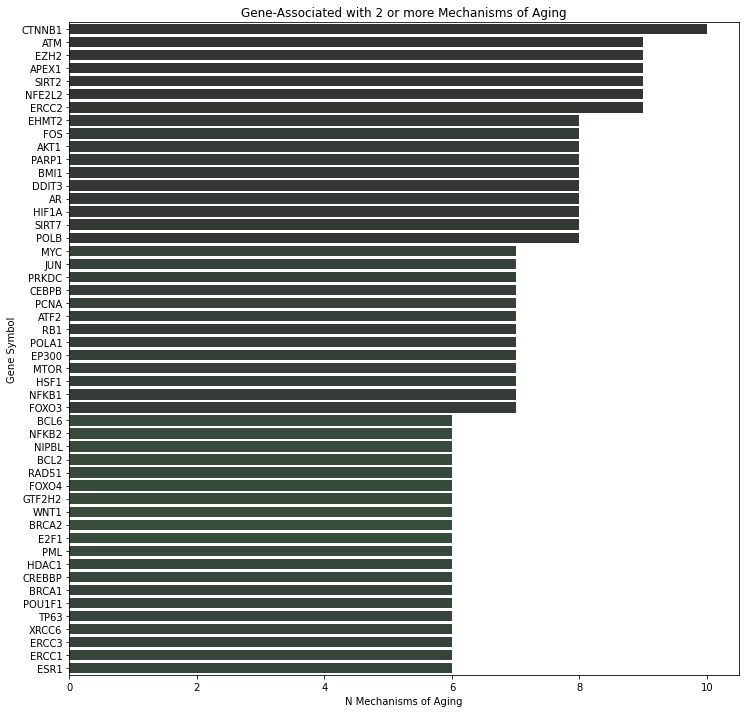

In [12]:
data = genes_mechanisms_df['symbol'].value_counts()

plt.figure(figsize=(12,12))
pal = sns.color_palette("Greens_d", len(data))
rank = data.argsort().argsort()

plt.title("Gene-Associated with 2 or more Mechanisms of Aging")
plt.xlabel("N Mechanisms of Aging")
plt.ylabel("Gene Symbol")

ax = sns.barplot(
    x=data.values[:50], 
    y=data.index[:50], 
    data=genes_mechanisms_df,
    palette=np.array(pal[::1])[rank]
)

### В качестве ингибиторов или активаторов выступают продуты данныхгенов в возраст-зависимых процессах? Есть ли расхождения попроцессам (можно сделать вывод о том насколько релевантна мишень)?

### На примере каких тканей проводились исследования, на каких модельных организмах?

### Как полиморфизмы в генах ассоциированы с возраст-зависимымипроцессами?

## Ассоциация вариантов в генах с долголетием

## Влияние ингибиторов/активаторов генов на продолжительность жизни (%) (затем гены можно также ранжировать по вкладу в увеличениепродолжительность жизни х модельного организма/человека)

## Посмотреть экспрессию по всем организмам и выявить те гены, экспрессиякоторых схожа во всех организмах, проследить связь с данными по эволюции.